# Zaimportowane moduły, lista plików i puste tabelki z danymi

In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from datetime import date
%matplotlib inline

In [2]:
file_paths = glob("data-2022-03/2022*.xls")
file_paths.sort()
data = pd.DataFrame()
error = pd.DataFrame()

file_names = []
for file in file_paths:
    file = file.split('/')
    file_names.append(file[1])

# Skrypt odczytujący pliki

In [3]:
rows2skip = (0, 1, 2, 8, 9, 10, 11)
dates = []
days = []

for f in file_names: 
    y = int(f[0:4]) 
    m = int(f[4:6])
    d = int(f[6:8])
    date_ = date(y, m, d)
    dates.append(date_)
    day = date(y, m, d).day - 4
    days.append(day)

for f in file_paths:
    plate = pd.read_excel(f, skiprows=rows2skip, usecols=range(2,13), index_col=0).rename(
        columns = {
            '1' : '80% WW4',
            '2' : '45% WW4',
            '3' : '15% WW4',
            '4' : '80% WW3',
            '5' : '45% WW3',
            '6' : '15% WW3',
            '7' : '80% WW2',
            '8' : '45% WW2',
            '9' : '15% WW2',
            '10' : 'M27'
        }
    )
    
    #automatyczne odejmowanie odpowiedniej ślepej
    for col in plate:
        plate[col] -= plate[col][3]
        
    plate = plate.drop('D')
    data = pd.concat([data, pd.DataFrame(plate.mean()).transpose()], ignore_index=True)
    error = pd.concat([error, pd.DataFrame(plate.sem()).transpose()], ignore_index=True)
    
data.insert(0, 'day', days)
data.insert(0, 'date', dates)
error.insert(0, 'day', days)
error.insert(0, 'date', dates)

# Tabelki z uśrednionymi danymi i błędami (SEM)

In [4]:
data

,date,day,80% WW4,45% WW4,15% WW4,80% WW3,45% WW3,15% WW3,80% WW2,45% WW2,15% WW2,M27
0,2022-03-04,0,0.106667,0.095333,0.100000,0.045667,0.095333,0.088667,0.090667,0.078333,0.079667,0.077000
1,2022-03-07,3,0.111667,0.141000,0.127000,0.121333,0.110667,0.146333,0.131667,0.157000,0.110333,0.172667
2,2022-03-09,5,0.190333,0.209333,0.163000,0.204000,0.197000,0.168333,0.179333,0.189333,0.167000,0.181333
3,2022-03-11,7,0.187667,0.280333,0.182000,0.219333,0.246000,0.202667,0.186000,0.255333,0.177667,0.267000
4,2022-03-14,10,0.180333,0.264000,0.242333,0.154667,0.294667,0.241000,0.172000,0.264667,0.260667,0.273000
5,2022-03-16,12,0.239000,0.354000,0.242667,0.210000,0.259000,0.298667,0.166667,0.289667,0.291000,0.348000
6,2022-03-18,14,0.176333,0.250667,0.228667,0.150667,0.232333,0.224667,0.173667,0.250333,0.219000,0.276333
7,2022-03-21,17,0.217667,0.288333,0.238000,0.181000,0.234333,0.248000,0.167333,0.261000,0.270667,0.318333
8,2022-03-23,19,0.165000,0.264333,0.258333,0.203667,0.266333,0.270667,0.184000,0.265667,0.282333,0.315000
9,2022-03-25,21,0.175667,0.259333,0.255667,0.208667,0.269667,0.271667,0.189000,0.276333,0.301000,0.318000


In [5]:
error

,date,day,80% WW4,45% WW4,15% WW4,80% WW3,45% WW3,15% WW3,80% WW2,45% WW2,15% WW2,M27
0,2022-03-04,0,0.000333,0.002848,0.016010,0.010105,0.004910,0.016677,0.003756,0.003283,0.001453,0.018583
1,2022-03-07,3,0.021866,0.035726,0.018248,0.032916,0.021404,0.027278,0.002186,0.027429,0.018478,0.031761
2,2022-03-09,5,0.002404,0.014836,0.008386,0.015373,0.011676,0.001856,0.004667,0.013421,0.004041,0.016190
3,2022-03-11,7,0.008007,0.018224,0.012423,0.006692,0.016503,0.011695,0.002082,0.022040,0.023412,0.044844
4,2022-03-14,10,0.002848,0.017954,0.024361,0.009244,0.038843,0.014154,0.006429,0.018022,0.038971,0.045236
5,2022-03-16,12,0.024685,0.014154,0.037826,0.012423,0.029738,0.009262,0.012347,0.010525,0.052918,0.018610
6,2022-03-18,14,0.001667,0.017910,0.022784,0.008950,0.012115,0.021365,0.002333,0.020078,0.035000,0.011667
7,2022-03-21,17,0.018774,0.021404,0.027713,0.012055,0.036411,0.012662,0.013170,0.010408,0.033198,0.016915
8,2022-03-23,19,0.002000,0.020827,0.018022,0.005207,0.009770,0.018523,0.001528,0.018836,0.022430,0.008021
9,2022-03-25,21,0.012333,0.020610,0.017188,0.004667,0.013642,0.014099,0.002517,0.008950,0.025968,0.006000


# Wykresy

In [6]:
def formatted_errorbar(ax, ww: str, title: str):
    ax.errorbar(
        x=data['day'],
        y=data['M27'],
        yerr=error['M27'],
        label='M27',
        fmt='o',
        color='g'
    )
    ax.errorbar(
        x=data['day'],
        y=data[f'15% {ww}'],
        yerr=error[f'15% {ww}'],
        label=f'15% {ww}',
        fmt='o',
        color='y'
    )
    ax.errorbar(
        x=data['day'],
        y=data[f'45% {ww}'],
        yerr=error[f'45% {ww}'],
        label=f'45% {ww}',
        fmt='o',
        color='orange'
    )
    ax.errorbar(
        x=data['day'],
        y=data[f'80% {ww}'],
        yerr=error[f'80% {ww}'],
        label=f'80% {ww}',
        fmt='o',
        color='r'
    )
    ax.grid()
    ax.set_xlim([-1, 25])
    ax.set_ylim([0, 0.4])
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
    ax.set_ylabel('OD$_{600}$', fontdict={'fontsize': 18})
    ax.set_title(title, loc='left', pad=10)
    ax.legend()

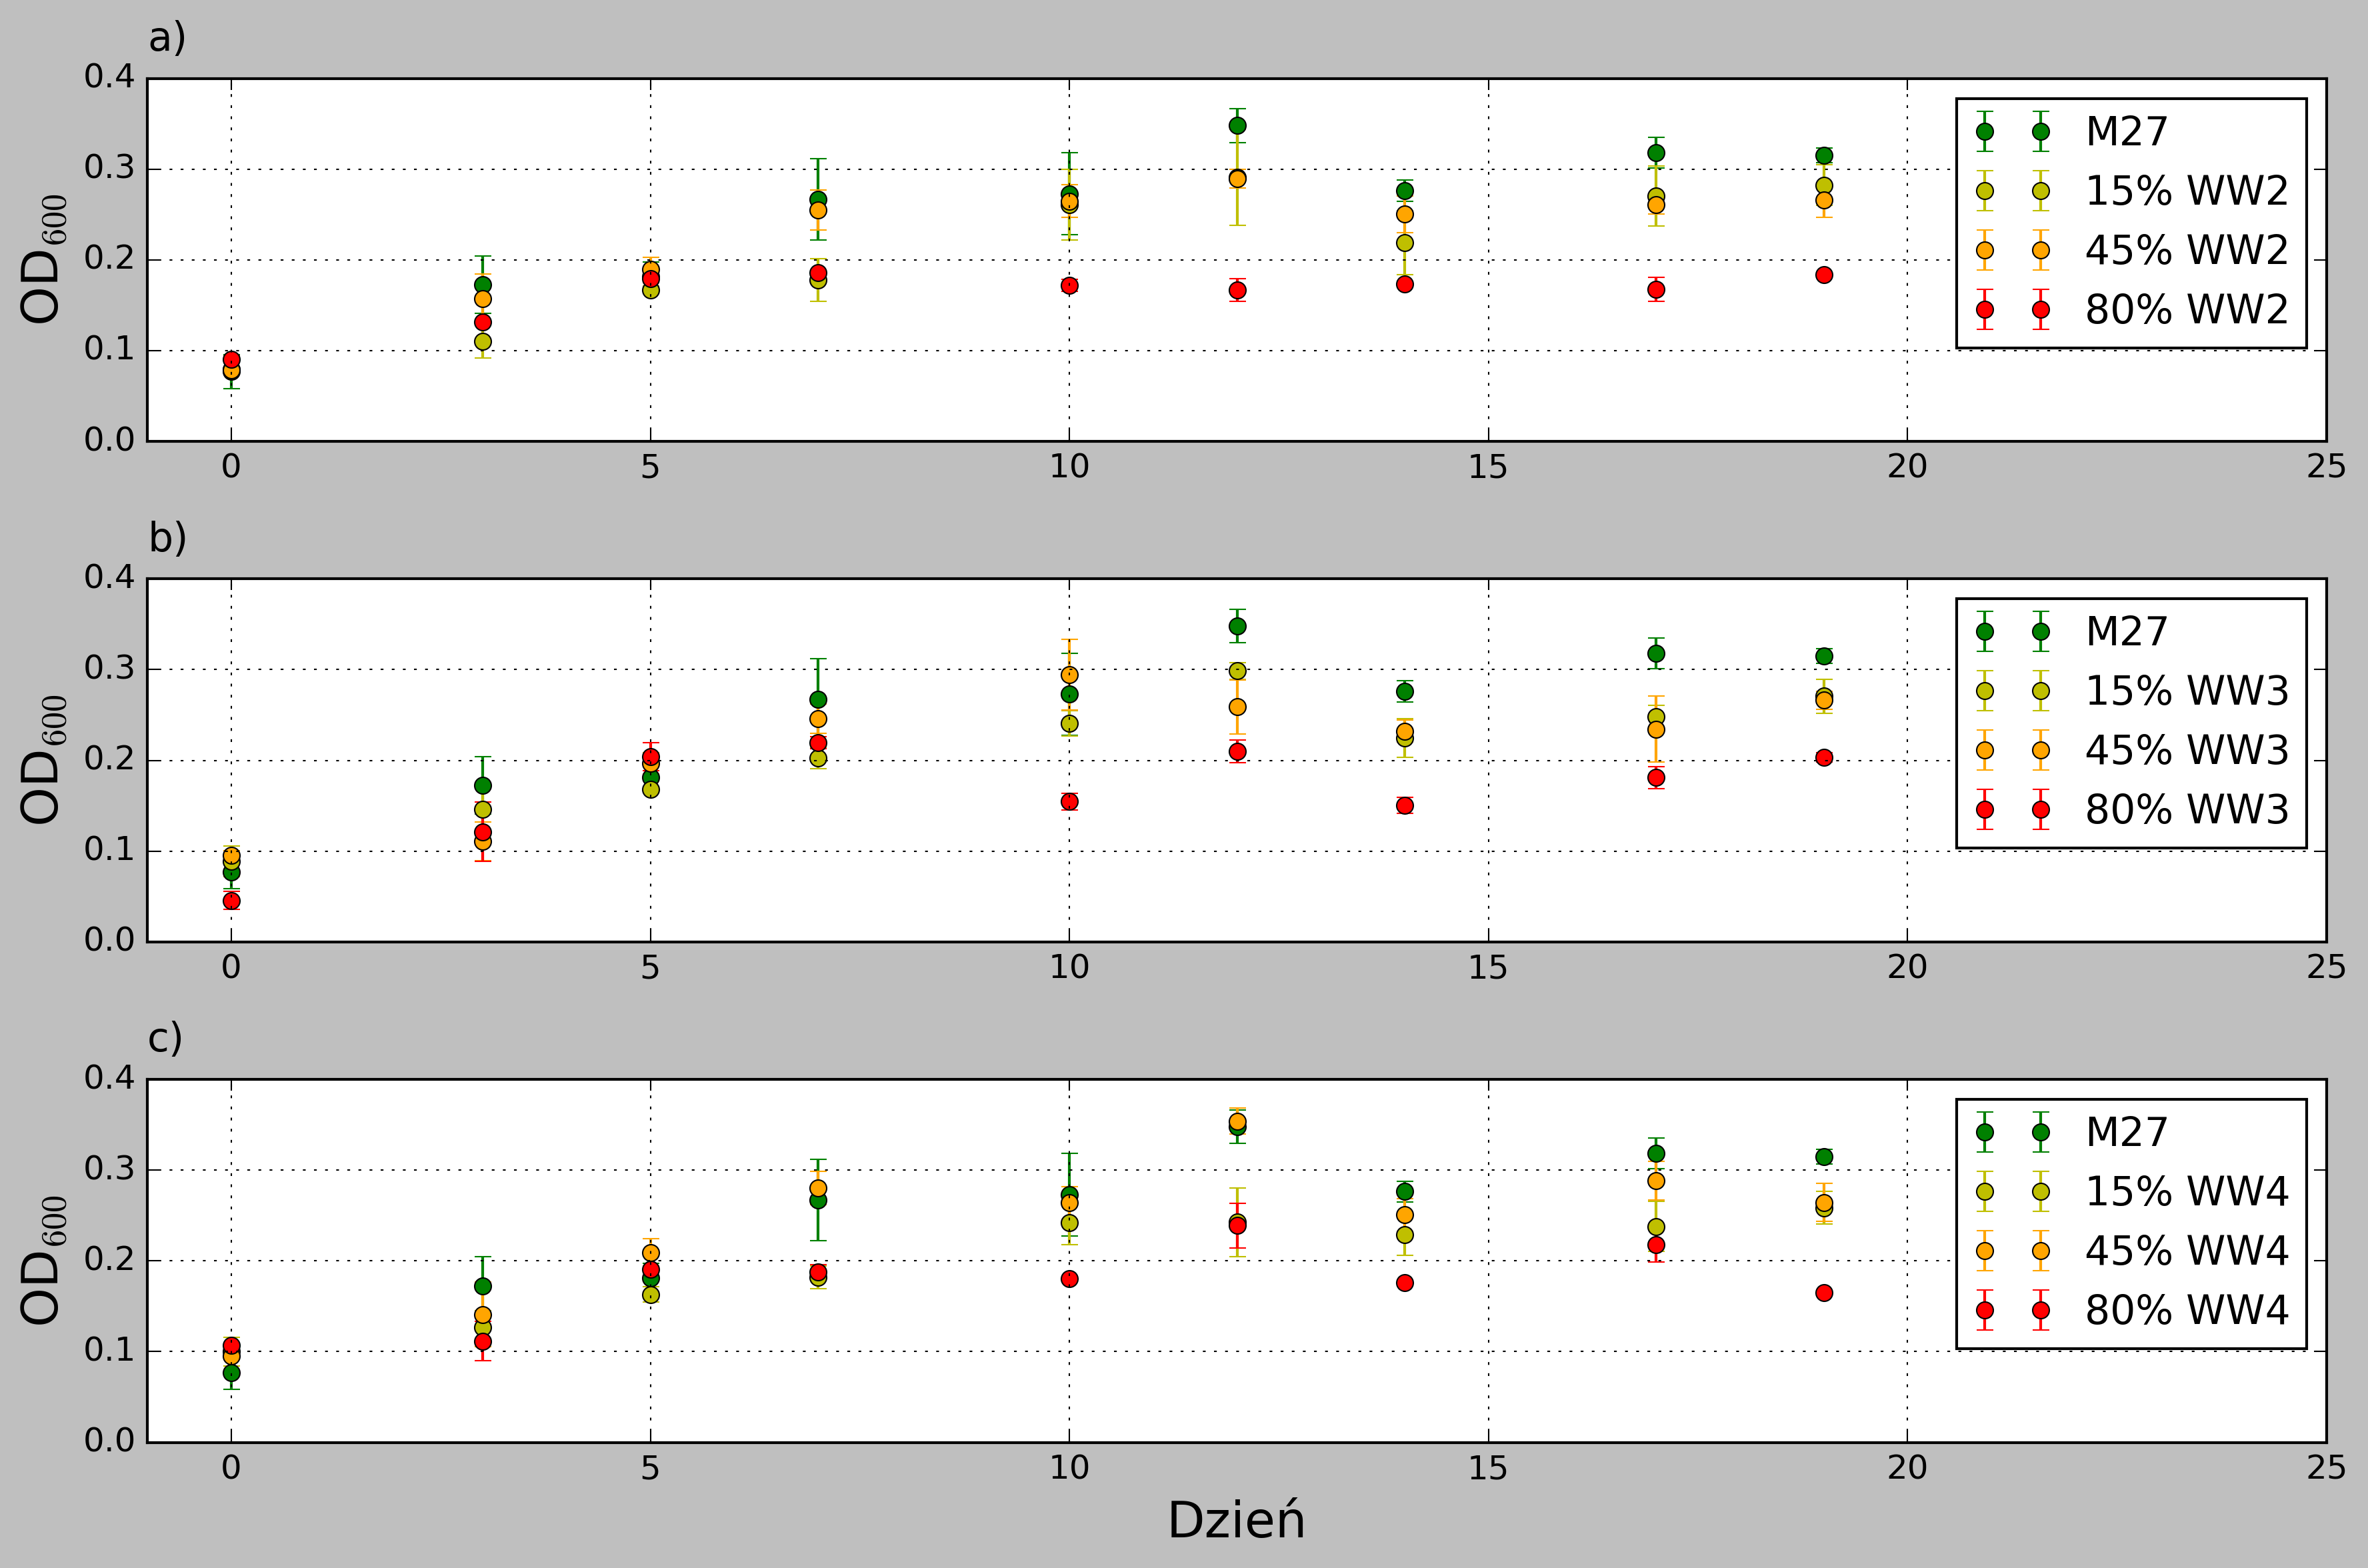

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 8), dpi=300)
plt.style.use('classic')
formatted_errorbar(ax1, ww='WW2', title='a)')
formatted_errorbar(ax2, ww='WW3', title='b)')
formatted_errorbar(ax3, ww='WW4', title='c)')
ax3.set_xlabel('Dzień', fontdict={'fontsize': 18})
fig.tight_layout()
fig.savefig('../manuscript/figures/ww.png')
plt.show()
plt.close(fig)